<a href="https://colab.research.google.com/github/ghubesharman/DataSciencePython/blob/main/Experiment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Load dataset from UCI ML repository (Wine dataset)
# URL: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
# Column names
columns = [
'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'
]
# Load the dataset
wine_df = pd.read_csv(url, header=None, names=columns)
# Features (X) and Target (y)
X = wine_df.iloc[:, 1:]
y = wine_df.iloc[:, 0]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01) # Alpha controls regularization strength
lasso.fit(X_train_scaled, y_train)
# Get coefficients of the features
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
# Print selected features (non-zero coefficients)
selected_lasso_features = lasso_coefficients[lasso_coefficients != 0]
print("Selected Features by Lasso:")
print(selected_lasso_features)
# Predict and evaluate model performance with selected features
# Filter the training and test data to include only the selected features
# Filter the training and test data to include only the selected features
X_train_lasso = X_train_scaled[:, lasso_coefficients != 0]
X_test_lasso = X_test_scaled[:, lasso_coefficients != 0]

# Create a new Lasso model and train it on the filtered dataset (with selected features)
lasso_selected = Lasso(alpha=0.01)  # Same alpha value as before
lasso_selected.fit(X_train_lasso, y_train)

# Train and evaluate the new Lasso model using the selected features
lasso_accuracy = lasso_selected.score(X_test_lasso, y_test)
print(f"\nLasso Model Accuracy with Selected Features: {lasso_accuracy:.4f}\n")


Selected Features by Lasso:
Alcohol                -0.071219
Malic_acid              0.036329
Ash                    -0.042738
Alcalinity_of_ash       0.134394
Total_phenols           0.027794
Flavanoids             -0.290350
Nonflavanoid_phenols   -0.014552
Color_intensity         0.160078
Hue                    -0.034355
OD280/OD315            -0.189098
Proline                -0.207816
dtype: float64

Lasso Model Accuracy with Selected Features: 0.8835



Random Forest Feature Importances:
Flavanoids              0.202293
Color_intensity         0.171202
Proline                 0.139046
Alcohol                 0.112398
OD280/OD315             0.111564
Hue                     0.070891
Magnesium               0.036841
Malic_acid              0.035703
Alcalinity_of_ash       0.032425
Total_phenols           0.029279
Proanthocyanins         0.023561
Ash                     0.021282
Nonflavanoid_phenols    0.013515
dtype: float64


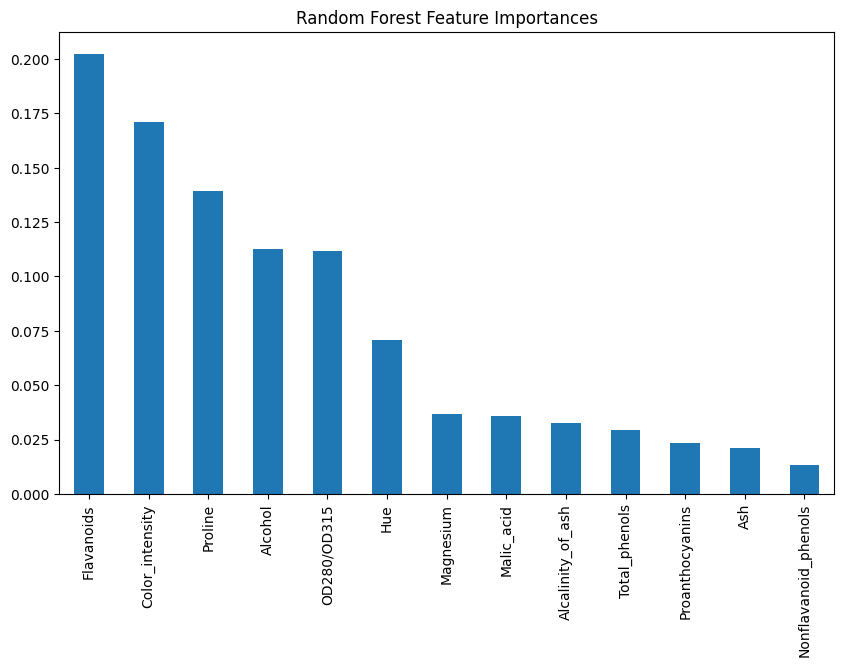

Random Forest Model Accuracy: 1.0000



In [5]:
# Apply Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature importances from the RandomForest model
rf_feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
# Sort and display important features
rf_feature_importances = rf_feature_importances.sort_values(ascending=False)
print("Random Forest Feature Importances:")
print(rf_feature_importances)
# Plot feature importance
plt.figure(figsize=(10, 6))
rf_feature_importances.plot(kind='bar')
plt.title('Random Forest Feature Importances')
plt.show()
# Predict and evaluate model performance with Random Forest
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}\n")

In [8]:
# Apply ElasticNet for feature selection
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)  # l1_ratio balances L1 and L2
elasticnet.fit(X_train_scaled, y_train)

# Get coefficients of the features
elasticnet_coefficients = pd.Series(elasticnet.coef_, index=X.columns)

# Print selected features (non-zero coefficients)
selected_elasticnet_features = elasticnet_coefficients[elasticnet_coefficients != 0]
print("Selected Features by ElasticNet:")
print(selected_elasticnet_features)

# Filter the training and test data to include only the selected features
X_train_elasticnet = X_train_scaled[:, elasticnet_coefficients != 0]
X_test_elasticnet = X_test_scaled[:, elasticnet_coefficients != 0]

# Create a new ElasticNet model and train it on the filtered dataset (with selected features)
elasticnet_selected = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet_selected.fit(X_train_elasticnet, y_train)

# Train and evaluate the new ElasticNet model using the selected features
elasticnet_accuracy = elasticnet_selected.score(X_test_elasticnet, y_test)
print(f"\nElasticNet Model Accuracy with Selected Features: {elasticnet_accuracy:.4f}\n")


Selected Features by ElasticNet:
Alcohol                -0.080129
Malic_acid              0.043094
Ash                    -0.050901
Alcalinity_of_ash       0.143202
Total_phenols           0.056797
Flavanoids             -0.312240
Nonflavanoid_phenols   -0.025976
Proanthocyanins         0.001450
Color_intensity         0.168036
Hue                    -0.030237
OD280/OD315            -0.195642
Proline                -0.207098
dtype: float64

ElasticNet Model Accuracy with Selected Features: 0.8830

